In [1]:
# importion de librairies

import pandas as pd
import numpy as np
import seaborn as sns
import ipywidgets
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold


In [2]:
url = "https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/Churn_Modelling_m.csv"

df = pd.read_csv(url, header = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      9999 non-null   float64
 4   Geography        10000 non-null  object 
 5   Gender           9986 non-null   object 
 6   Age              9960 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          9963 non-null   float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  9999 non-null   float64
 13  Exited           10000 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


## Data Cleaning (Nettoyage de donnees)

In [3]:
# Variables manquantes

print(df.isna().sum())
df.isna().sum()/len(df)

RowNumber           0
CustomerId          0
Surname             0
CreditScore         1
Geography           0
Gender             14
Age                40
Tenure              0
Balance            37
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     1
Exited              0
dtype: int64


RowNumber          0.0000
CustomerId         0.0000
Surname            0.0000
CreditScore        0.0001
Geography          0.0000
Gender             0.0014
Age                0.0040
Tenure             0.0000
Balance            0.0037
NumOfProducts      0.0000
HasCrCard          0.0000
IsActiveMember     0.0000
EstimatedSalary    0.0001
Exited             0.0000
dtype: float64

<Axes: >

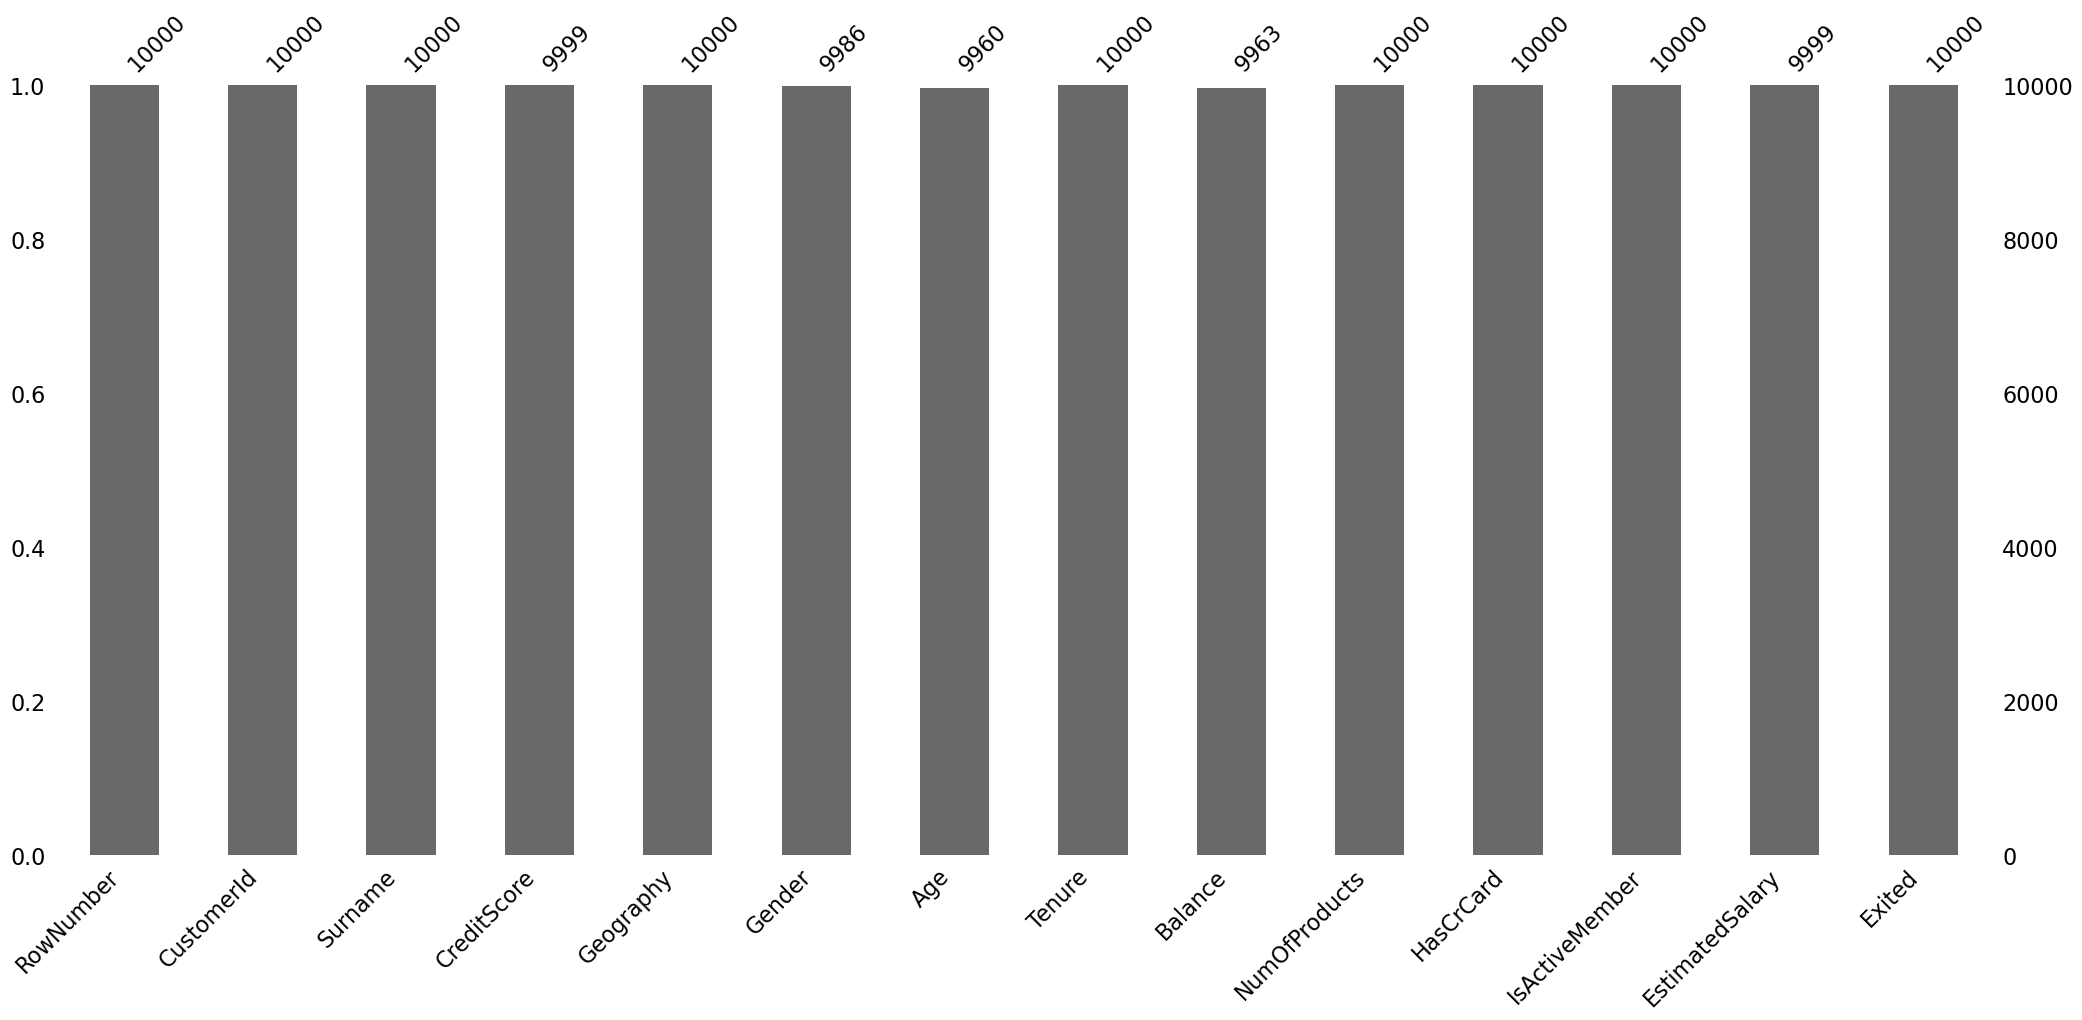

In [4]:
msno.bar(df)

In [5]:
# Suppresion des donnees manquantes car ils sont en faible proportion : < 1%

df.dropna(inplace= True)
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.nunique()

RowNumber          9908
CustomerId         9908
Surname            2912
CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6318
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9907
Exited                2
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
display(df, 10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
6,7,15592531,Bartlett,822.0,France,Male,50.0,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376.0,Germany,Female,29.0,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501.0,France,Male,44.0,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771.0,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516.0,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709.0,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772.0,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


10

In [9]:
df.drop(labels=["RowNumber","Surname"], axis = 1, inplace = True)
display(df)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
6,15592531,822.0,France,Male,50.0,7,0.00,2,1,1,10062.80,0
7,15656148,376.0,Germany,Female,29.0,4,115046.74,4,1,0,119346.88,1
8,15792365,501.0,France,Male,44.0,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771.0,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,15569892,516.0,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,15584532,709.0,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,15682355,772.0,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


## Exploratory Data Analysis (Analyse exploratoire de donnees)

In [10]:
colonne_categorielle = df.columns[df.dtypes == "object"]
print(colonne_categorielle)

Index(['Geography', 'Gender'], dtype='object')


In [83]:
colonne_binaire = ["HasCrCard","IsActiveMember","Exited"]
colonne_quantitative = ["CreditScore","Age", "Balance","Tenure","EstimatedSalary"]

In [12]:
# Visualisation dynamique et interractive

def bar_plot(a):
    df[a].value_counts(normalize = True).plot(kind ='bar')
    plt.ylabel("Proportion")
    plt.title("Distribution de " + str(a))
    plt.xticks(rotation= 45)
    return plt.show()

In [13]:
# barplot des variables categorielles

ipywidgets.interact(bar_plot, a = colonne_categorielle)

interactive(children=(Dropdown(description='a', options=('Geography', 'Gender'), value='Geography'), Output())…

<function __main__.bar_plot(a)>

In [14]:
# barplot des variables binaires

ipywidgets.interact(bar_plot, a = colonne_binaire)

interactive(children=(Dropdown(description='a', options=('HasCrCard', 'IsActiveMember', 'Exited'), value='HasC…

<function __main__.bar_plot(a)>

- On observe un desequilibre de classe sur le taux de churn 80%(non) VS 20%(oui)

In [15]:
def hist_plot(b):
    df[b].hist()
    plt.title("Distribution de "+str(b))
    return plt.show()

In [ ]:
# Histogramme des variables quantitatives continues

ipywidgets.interact(hist_plot, b = colonne_quantitative)

interactive(children=(Dropdown(description='b', options=('CreditScore', 'Age', 'Balance', 'Tenure', 'Estimated…

<function __main__.hist_plot(b)>

In [ ]:
# Boxplot des variables quantitatives continues

def box_plot(b):
    sns.boxplot(y = df[b])
    plt.title("Boite a moustache de "+ str(b))
    return plt.show()

ipywidgets.interact(box_plot, b = colonne_quantitative)

interactive(children=(Dropdown(description='b', options=('CreditScore', 'Age', 'Balance', 'Tenure', 'Estimated…

<function __main__.box_plot(b)>

In [ ]:
# Boxplot multivarie des variables quantitatives continues en fonction du churn

def box_biplot(b):
    sns.boxplot( x= df["Exited"], y = df[b])
    plt.title("Boite a moustache de "+ str(b))
    return plt.show()

ipywidgets.interact(box_biplot, b = colonne_quantitative)

interactive(children=(Dropdown(description='b', options=('CreditScore', 'Age', 'Balance', 'Tenure', 'Estimated…

<function __main__.box_biplot(b)>

In [87]:
df[colonne_quantitative].describe().round()

,CreditScore,Age,Balance,Tenure,EstimatedSalary
count,9908.0,9908.0,9908.0,9908.0,9908.0
mean,651.0,39.0,76428.0,5.0,100104.0
std,97.0,10.0,62418.0,3.0,57494.0
min,350.0,18.0,0.0,0.0,12.0
25%,584.0,32.0,0.0,3.0,51116.0
50%,652.0,37.0,97083.0,5.0,100218.0
75%,717.0,44.0,127644.0,8.0,149382.0
max,850.0,92.0,250898.0,10.0,199992.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9908 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9908 non-null   int64  
 1   CreditScore      9908 non-null   float64
 2   Geography        9908 non-null   object 
 3   Gender           9908 non-null   object 
 4   Age              9908 non-null   float64
 5   Tenure           9908 non-null   int64  
 6   Balance          9908 non-null   float64
 7   NumOfProducts    9908 non-null   int64  
 8   HasCrCard        9908 non-null   int64  
 9   IsActiveMember   9908 non-null   int64  
 10  EstimatedSalary  9908 non-null   float64
 11  Exited           9908 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1006.3+ KB


In [21]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
6,15592531,822.0,France,Male,50.0,7,0.00,2,1,1,10062.80,0
7,15656148,376.0,Germany,Female,29.0,4,115046.74,4,1,0,119346.88,1
8,15792365,501.0,France,Male,44.0,4,142051.07,2,0,1,74940.50,0


In [22]:
df.groupby(["Gender"])["EstimatedSalary"].mean().round()

Gender
Female    100645.0
Male       99654.0
Name: EstimatedSalary, dtype: float64

In [23]:
print("Le salaire maximal par genre est :")
display(df.groupby(["Gender"])["EstimatedSalary"].max().round())


print("Le salaire minimal par genre est :")
df.groupby(["Gender"])["EstimatedSalary"].min().round()

Le salaire maximal par genre est :


Gender
Female    199992.0
Male      199953.0
Name: EstimatedSalary, dtype: float64

Le salaire minimal par genre est :


Gender
Female    92.0
Male      12.0
Name: EstimatedSalary, dtype: float64

In [24]:
df.groupby(["Gender"])["CreditScore"].sum().round()

Gender
Female    2928846.0
Male      3516949.0
Name: CreditScore, dtype: float64

In [25]:
df.groupby(["Geography"])["Exited"].value_counts()

Geography  Exited
France     0         4172
           1          804
Germany    0         1674
           1          806
Spain      0         2044
           1          408
Name: count, dtype: int64

## Data Preprocessing (Prétraitement de données)

In [26]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
6,15592531,822.0,France,Male,50.0,7,0.00,2,1,1,10062.80,0
7,15656148,376.0,Germany,Female,29.0,4,115046.74,4,1,0,119346.88,1
8,15792365,501.0,France,Male,44.0,4,142051.07,2,0,1,74940.50,0


In [27]:
# Encodage de la variable Gender

df["Gender"] = df["Gender"].apply(lambda row : 1 if row == "Female" else 0)
display(df)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619.0,France,1,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608.0,Spain,1,41.0,1,83807.86,1,0,1,112542.58,0
6,15592531,822.0,France,0,50.0,7,0.00,2,1,1,10062.80,0
7,15656148,376.0,Germany,1,29.0,4,115046.74,4,1,0,119346.88,1
8,15792365,501.0,France,0,44.0,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771.0,France,0,39.0,5,0.00,2,1,0,96270.64,0
9996,15569892,516.0,France,0,35.0,10,57369.61,1,1,1,101699.77,0
9997,15584532,709.0,France,1,36.0,7,0.00,1,0,1,42085.58,1
9998,15682355,772.0,Germany,0,42.0,3,75075.31,2,1,0,92888.52,1


In [28]:
df_dummies = pd.get_dummies(df["Geography"], prefix ='Country', drop_first= True)
display(df_dummies)

,Country_Germany,Country_Spain
0,False,False
1,False,True
6,False,False
7,True,False
8,False,False
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [29]:
df_concat = pd.concat([df, df_dummies], axis = 1)
display(df_concat)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Country_Germany,Country_Spain
0,15634602,619.0,France,1,42.0,2,0.00,1,1,1,101348.88,1,False,False
1,15647311,608.0,Spain,1,41.0,1,83807.86,1,0,1,112542.58,0,False,True
6,15592531,822.0,France,0,50.0,7,0.00,2,1,1,10062.80,0,False,False
7,15656148,376.0,Germany,1,29.0,4,115046.74,4,1,0,119346.88,1,True,False
8,15792365,501.0,France,0,44.0,4,142051.07,2,0,1,74940.50,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771.0,France,0,39.0,5,0.00,2,1,0,96270.64,0,False,False
9996,15569892,516.0,France,0,35.0,10,57369.61,1,1,1,101699.77,0,False,False
9997,15584532,709.0,France,1,36.0,7,0.00,1,0,1,42085.58,1,False,False
9998,15682355,772.0,Germany,0,42.0,3,75075.31,2,1,0,92888.52,1,True,False


In [30]:
df_concat.drop(labels=["CustomerId","Geography"], axis= 1, inplace= True)
df_concat.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Country_Germany,Country_Spain
0,619.0,1,42.0,2,0.00,1,1,1,101348.88,1,False,False
1,608.0,1,41.0,1,83807.86,1,0,1,112542.58,0,False,True
6,822.0,0,50.0,7,0.00,2,1,1,10062.80,0,False,False
7,376.0,1,29.0,4,115046.74,4,1,0,119346.88,1,True,False
8,501.0,0,44.0,4,142051.07,2,0,1,74940.50,0,False,False


In [31]:
df_concat[["Country_Germany","Country_Spain"]] = df_concat[["Country_Germany","Country_Spain"]].map(int)
df_concat.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Country_Germany,Country_Spain
0,619.0,1,42.0,2,0.00,1,1,1,101348.88,1,0,0
1,608.0,1,41.0,1,83807.86,1,0,1,112542.58,0,0,1
6,822.0,0,50.0,7,0.00,2,1,1,10062.80,0,0,0
7,376.0,1,29.0,4,115046.74,4,1,0,119346.88,1,1,0
8,501.0,0,44.0,4,142051.07,2,0,1,74940.50,0,0,0


In [32]:
# Division des donnees en Train, Test et Validation

X = df_concat.drop("Exited", axis = 1)
y = df_concat["Exited"]

seed = 121

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= seed, stratify= y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state= seed, stratify= y_test)

# On a donnc donnes entrainement(60%), test(20%) et validation(20%)

In [33]:
# Grace au parametre stratify de train_test_split on garde les memes proportion dans les jeux de donnes

display(pd.DataFrame(y).value_counts(normalize=True))
display(pd.DataFrame(y_train).value_counts(normalize=True))
display(pd.DataFrame(y_test).value_counts(normalize=True))
display(pd.DataFrame(y_val).value_counts(normalize=True))

Exited
0         0.796326
1         0.203674
Name: proportion, dtype: float64

Exited
0         0.796265
1         0.203735
Name: proportion, dtype: float64

Exited
0         0.79667
1         0.20333
Name: proportion, dtype: float64

Exited
0         0.796165
1         0.203835
Name: proportion, dtype: float64

Comme nous avons pu le constater dans l'analyse exploratoire il y a un déséquilibre de classe dans la variable Exited entre 
- ceux qui quittent la banque (Churner) : 20%
      
- ceux qui restent (non churner) : 80%

Il faut donc résoudre ce déséquilibre pour éviter des bias dans notre modèle de prédiction. Pour cela nous ferons du réchantillonnage sur les données :
- Augmentation artificielle de la proportion des Churners(Oversampling)
- Baise artificielle de la proportion de la classe des non churners(undersampling)


In [34]:
# Sur-échantillonage des churners : Oversampling

X_up = X_train

X_up["Churn"] = y_train

Churner = X_up[X_up.Churn == 1]
Non_Churner = X_up[X_up.Churn == 0]

Churner_upsampled = resample(Churner, replace = True, n_samples= len(Non_Churner), random_state= seed)

df_upsampled = pd.concat([Churner_upsampled, Non_Churner])
display(df_upsampled)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Country_Germany,Country_Spain,Churn
2580,697.0,1,38.0,6,132591.36,1,1,1,7387.80,1,0,1
1212,610.0,0,42.0,6,0.00,2,1,0,158302.59,0,1,1
8306,770.0,1,33.0,4,0.00,1,1,0,26080.54,0,0,1
2362,709.0,0,45.0,4,122917.71,1,1,1,11.58,1,0,1
4634,610.0,1,45.0,3,0.00,1,1,0,38276.84,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
508,733.0,0,22.0,5,0.00,2,1,1,117202.19,0,0,0
2275,550.0,1,48.0,6,0.00,2,1,1,191870.28,0,0,0
9504,560.0,1,44.0,5,143244.97,1,1,0,98661.27,0,0,0
8276,580.0,0,32.0,9,142188.20,2,0,1,128028.60,0,1,0


In [35]:
df_upsampled["Churn"].value_counts(normalize = True)

Churn
1    0.5
0    0.5
Name: proportion, dtype: float64

In [36]:
X_train_up = df_upsampled.drop("Churn", axis = 1)

y_train_up = df_upsampled["Churn"]

In [37]:
# Sous-échantillonage des non churners : undersampling

Non_Churner_downsampled = resample(Non_Churner, replace = False, n_samples= len(Churner), random_state= seed)

df_downsampled = pd.concat([Non_Churner_downsampled, Churner])
display(df_downsampled)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Country_Germany,Country_Spain,Churn
344,718.0,1,25.0,7,0.00,2,1,0,30380.12,0,0,0
1844,667.0,1,48.0,2,0.00,2,1,1,148608.39,0,0,0
3098,539.0,1,24.0,3,0.00,2,1,1,198161.07,0,0,0
8496,577.0,0,43.0,3,0.00,2,1,1,135008.92,0,1,0
110,685.0,0,30.0,3,90536.81,1,0,1,63082.88,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9947,615.0,0,34.0,1,83503.11,2,1,1,73124.53,0,0,1
9199,544.0,1,26.0,6,0.00,1,1,0,100200.40,0,0,1
5721,696.0,0,49.0,5,97036.22,2,1,0,152450.84,1,0,1
357,522.0,0,34.0,9,126436.29,1,1,0,174248.52,0,1,1


In [38]:
df_downsampled["Churn"].value_counts(normalize = True)

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

In [39]:
X_train_down = df_downsampled.drop("Churn", axis = 1)

y_train_down = df_downsampled["Churn"]

In [40]:
y_train = X_train["Churn"]

X_train = X_train.drop("Churn", axis = True)

In [41]:
# Choix automatise des donnees d'entrainement avec des noms systematiques
# Possibilites : (X_train, y_train) ; (X_train_up, y_train_up) ; (X_train_down, y_train_down)
# Selon de jeux de donnes d'entrainement qu'on voudra on pourra juste changer ces lignes des codes

train_features = X_train_up

train_labels = y_train_up

In [42]:
# Pour réduire l'effet d'échelle et unitarisé les donnees nous allons standardisé nos données
# ou une normalisation 
# min_max_scaler = preprocessing.MinMaxScaler() 

scaler = preprocessing.StandardScaler()



scaler_fitted = scaler.fit(train_features)

train_features = scaler_fitted.transform(train_features)
X_test = scaler_fitted.transform(X_test)
X_val = scaler_fitted.transform(X_val)


train_features = pd.DataFrame(train_features, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)
X_val  = pd.DataFrame(X_val, columns = X.columns)

In [43]:
display(train_features)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Country_Germany,Country_Spain
0,0.503656,1.042968,-0.284381,0.343917,0.838273,-0.750421,0.657817,1.098186,-1.616361,1.483285,-0.534268
1,-0.390140,-0.958803,0.094887,0.343917,-1.320145,0.738779,0.657817,-0.910593,1.007768,-0.674179,1.871719
2,1.253622,1.042968,-0.758465,-0.345665,-1.320145,-0.750421,0.657817,-0.910593,-1.291329,-0.674179,-0.534268
3,0.626938,-0.958803,0.379338,-0.345665,0.680799,-0.750421,0.657817,1.098186,-1.744620,1.483285,-0.534268
4,-0.390140,1.042968,0.379338,-0.690456,-1.320145,-0.750421,0.657817,-0.910593,-1.079258,-0.674179,1.871719
...,...,...,...,...,...,...,...,...,...,...,...
9461,0.873503,-0.958803,-1.801451,-0.000874,-1.320145,0.738779,0.657817,1.098186,0.293108,-0.674179,-0.534268
9462,-1.006550,1.042968,0.663788,0.343917,-1.320145,0.738779,0.657817,1.098186,1.591448,-0.674179,-0.534268
9463,-0.903815,1.042968,0.284521,-0.000874,1.011701,-0.750421,0.657817,-0.910593,-0.029284,-0.674179,-0.534268
9464,-0.698345,-0.958803,-0.853282,1.378290,0.994498,0.738779,-1.520180,1.098186,0.481359,-0.674179,1.871719


## Machine learning Modelisation : Mise en place des modèles d'apprentissage automatique

Nous mettrons en place deux modèles pour de ML predire le churn :

- Régression Logistique

- Forêt aléatoire

In [44]:
# Modele 1 : regression logistique
# On choisi le 'F1 Score' comme metrique d'evaluation a cause du desequilbre de classe dans notre label


# Hyperparamètre : 
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 200, 500],
             'solver':["lbfgs","liblinear", "newton-cholesky"]}

cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= seed)

grid_lr = GridSearchCV(LogisticRegression(random_state= seed, max_iter = 500), 
                       param_grid= param_grid, 
                       cv = cv, 
                       scoring= 'f1')

# Entrainement du modele
lr_model = grid_lr.fit(train_features, train_labels)

# Meilleur score et hyperparametres
print(lr_model.best_estimator_)
print(lr_model.best_score_)

LogisticRegression(C=0.001, max_iter=500, random_state=121)
0.7009120933293369


In [45]:
# Evaluation du modele avec les donnees de validation : (X_val, y_val)

pred = lr_model.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1578
           1       0.40      0.67      0.50       404

    accuracy                           0.73      1982
   macro avg       0.65      0.71      0.66      1982
weighted avg       0.80      0.73      0.75      1982



In [46]:
# Modele 2 : Regression logistique avec reduction de variable 
# Algorithme RFE (Recursive Feature Elimination) 

lr_rfe_model = RFE(lr_model.best_estimator_, verbose= 0)
lr_rfe_model.fit(train_features, train_labels)

mask = lr_rfe_model.support_
reduced_X = train_features.loc[:, mask]

print(reduced_X.columns)


Index(['Gender', 'Age', 'Balance', 'IsActiveMember', 'Country_Germany'], dtype='object')


In [47]:
# Evaluation du modele avec les donnees de validation : (X_val, y_val)

pred = lr_rfe_model.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1578
           1       0.40      0.68      0.51       404

    accuracy                           0.73      1982
   macro avg       0.65      0.71      0.66      1982
weighted avg       0.80      0.73      0.75      1982



On constate que le modele s'améliore très légèrement sur la prediction des Churner(1)
après élimination de de plusieurs variables pour conserver que :
- 'Gender', 'Age', 'Balance', 'IsActiveMember', 'Country_Germany'

In [48]:
# Modele 3 : Foret aleatoire (Random Forest)

# Hyperparamètre : 
param_grid_rf = {'n_estimators':[10, 50, 100, 500, 1000]}

grid_rf = GridSearchCV(RandomForestClassifier(random_state= seed), 
                       param_grid= param_grid_rf, 
                       scoring= 'f1', 
                       cv = cv)

rf_model = grid_rf.fit(train_features, train_labels)

print(rf_model.best_estimator_)
print(rf_model.best_score_)

RandomForestClassifier(n_estimators=500, random_state=121)
0.951665521761646


In [49]:
pred = rf_model.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1578
           1       0.70      0.52      0.60       404

    accuracy                           0.86      1982
   macro avg       0.79      0.73      0.76      1982
weighted avg       0.85      0.86      0.85      1982



In [50]:
# Modele 4 : Foret aleatoire (Random Forest) avec reduction de variable 
# Algorithme RFE (Recursive Feature Elimination) 

rf_rfe_model = RFE(rf_model.best_estimator_, verbose= 0)
rf_rfe_model.fit(train_features, train_labels)

mask = rf_rfe_model.support_
reduced_X = train_features.loc[:, mask]

print(reduced_X.columns)

Index(['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary'], dtype='object')


In [51]:
pred = rf_rfe_model.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1578
           1       0.56      0.46      0.51       404

    accuracy                           0.82      1982
   macro avg       0.71      0.69      0.70      1982
weighted avg       0.81      0.82      0.81      1982



### Résumer et comparaison des modèles

| Modèle | Accuracy | f1 (Classe Non Churner) | f1 (Classe Curners) | 
|--------|:--------:|:-------------:|:-------------:|
| **Régression logistique** | 0.73     | 0.81          | 0.50          |
| **Régression logistique avec RFE** | 0.73     | 0.81          | 0.51          |
| **Fôret aléatoire** | 0.86     | 0.91          | 0.60          |
| **Fôret aléatoire avec RFE** | 0.82     | 0.89          | 0.51          |

Comme on peut le voir le modèle 3 de fôret aléatoire est le best : 
- Bon compromis Accuracy & f1 Score 
- Meilleur prédiction sur la classe minoritaire (Churner)


In [ ]:
# Creation d'une pipeline

from sklearn.pipeline import Pipeline
import joblib

pipe = Pipeline(steps=[
    ("modele", RandomForestClassifier(random_state=seed))
])


cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= seed)

param_grid_rf = {'modele__n_estimators':[10, 50, 100, 500, 1000]}

grid_rf_pipe = GridSearchCV(estimator = pipe,
                            param_grid= param_grid_rf,
                            scoring= "f1",
                            cv = cv)

grid_rf_pipe.fit(train_features, train_labels)

print("Meilleurs paramètres :", grid_rf_pipe.best_params_)
print("Meilleur score (F1) :", grid_rf_pipe.best_score_)


pred = rf_rfe_model.predict(X_val)
print(classification_report(y_val, pred))

# Enregistrement du pipeline
joblib.dump(grid_rf_pipe.best_estimator_, "Pipeline_Churn_prediction_random_forest.jolib")

Meilleurs paramètres : {'modele__n_estimators': 500}
Meilleur score (F1) : 0.951665521761646


['Pipeline_Churn_prediction_random_forest.jolib']

In [ ]:
# Chargement du pipeline et evaluation de la performance finale sur (X_test, y_test)

pipe_loaded = joblib.load("Pipeline_Churn_prediction_random_forest.jolib")

pred = pipe_loaded.predict(X_test)

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1579
           1       0.72      0.55      0.62       403

    accuracy                           0.86      1982
   macro avg       0.80      0.75      0.77      1982
weighted avg       0.86      0.86      0.86      1982



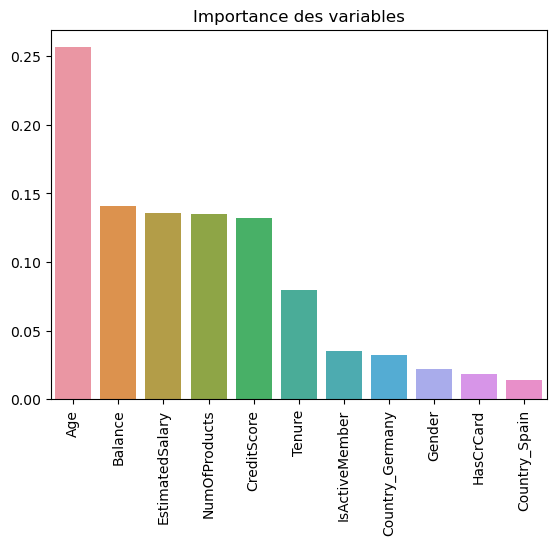

In [88]:
importances = grid_rf_pipe.best_estimator_.named_steps['modele'].feature_importances_
feat_importances = pd.Series(importances, index=train_features.columns).sort_values(ascending=False)


sns.barplot(x=feat_importances.index, y=feat_importances)
plt.xticks(rotation = 90)
plt.title("Importance des variables")
plt.show()


## FIN DU PROJET

- Meilleur performance du modèle de forêt aléatoire sur les données de test
- Accuracy : 86%
- f1 pour les clients qui restent : 92%
- f1 pour les client Churners : 62%

In [82]:
colonne_quantitative

['CreditScore', 'Age', 'Tenure', 'EstimatedSalary']